# Introduction to regression models

Import relevant libraries

In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load data

In [81]:
wine_df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', delimiter=';')

In [82]:
wine_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


Get 100 samples with random state (seed) = 1

In [83]:
sample_wine_df = wine_df.sample(n=100,random_state=1)
sample_wine_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
75,8.8,0.410,0.64,2.2,0.093,9.0,42.0,0.99860,3.54,0.66,10.5,5
1283,8.7,0.630,0.28,2.7,0.096,17.0,69.0,0.99734,3.26,0.63,10.2,6
408,10.4,0.340,0.58,3.7,0.174,6.0,16.0,0.99700,3.19,0.70,11.3,6
1281,7.1,0.460,0.20,1.9,0.077,28.0,54.0,0.99560,3.37,0.64,10.4,6
1118,7.1,0.390,0.12,2.1,0.065,14.0,24.0,0.99252,3.30,0.53,13.3,6
...,...,...,...,...,...,...,...,...,...,...,...,...
529,9.9,0.630,0.24,2.4,0.077,6.0,33.0,0.99740,3.09,0.57,9.4,5
912,10.0,0.460,0.44,2.9,0.065,4.0,8.0,0.99674,3.33,0.62,12.2,6
1227,9.0,0.580,0.25,2.0,0.104,8.0,21.0,0.99769,3.27,0.72,9.6,5
1374,6.8,0.815,0.00,1.2,0.267,16.0,29.0,0.99471,3.32,0.51,9.8,3


## Create your own linear model

Plot pH in function of fixed acidity

In [84]:
[str(x) for x in list(range(5,15))]

['5', '6', '7', '8', '9', '10', '11', '12', '13', '14']

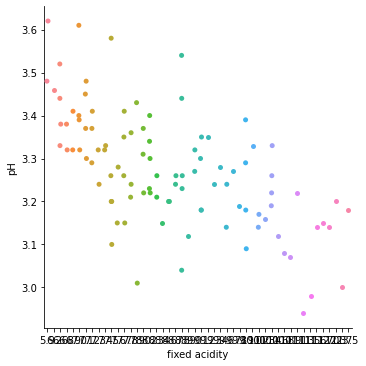

In [85]:
s_x=sample_wine_df['fixed acidity']
s_y=sample_wine_df['pH']
g = sns.catplot(x=s_x, y=s_y, data=sample_wine_df)
#g.set(xticks=[5,20])
#g.set_xticklabels([str(x) for x in list(range(5,15))])
#g.set_xticks([str(x) for x in list(range(5,15))])
#g.set_xticks(range(len(s_x)+1))
#g.set_xticklabels(['5','15'])
#g.set(xlim=(4, 15), xticks=[5,15])

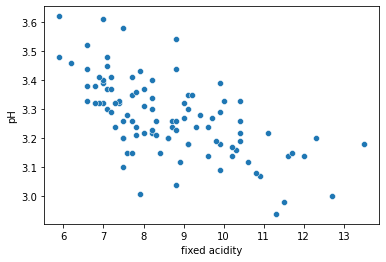

In [86]:
sns.scatterplot(x=sample_wine_df["fixed acidity"], y=sample_wine_df["pH"]);

### Analyse correlation 

What can you say about pH and fixed acidity? are they correlated ? 

In [87]:
corr = sample_wine_df.corr()

<AxesSubplot:>

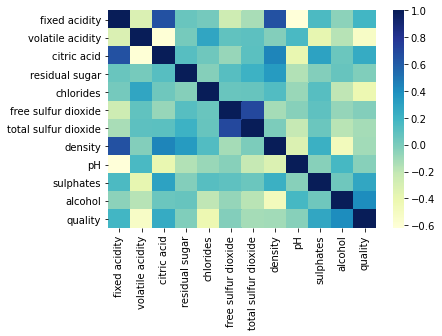

In [88]:
# Heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        cmap= "YlGnBu")

In [89]:
# Unstack correlation matrix 
corr_df = corr.unstack().reset_index() 
corr_df

# rename columns
corr_df.columns = ['feature_1','feature_2', 'correlation'] 

# sort by correlation
corr_df.sort_values(by="correlation",ascending=False, inplace=True) 

# Remove self correlation
corr_df = corr_df[corr_df['feature_1'] != corr_df['feature_2']] 
corr_df.head()

,feature_1,feature_2,correlation
66,free sulfur dioxide,total sulfur dioxide,0.697088
77,total sulfur dioxide,free sulfur dioxide,0.697088
2,fixed acidity,citric acid,0.658054
24,citric acid,fixed acidity,0.658054
7,fixed acidity,density,0.652115


In [90]:
pH_corr_df = corr_df[corr_df['feature_1'] == 'pH']
pH_corr_df[pH_corr_df['feature_2'] == 'fixed acidity']

,feature_1,feature_2,correlation
96,pH,fixed acidity,-0.619941


**Answer:** pH and fixed acidity have a negatif correlation of -0.619 ... this means that there is a certain linear tendency where one part of the fixed acidity can explain the variance of pH

### Creating your  linear model by hand

Try to find a linear model by hand. plot it with the sample set

Hint: define an intercept and slope. Then, plot it graphically

y = a * x + b, where a is slope and b is intercept

In [91]:
def plot_line(a, b, ax):
    """Plot a line from slope and intercept on the ax"""
    x_vals = np.array(ax.get_xlim())
    y_vals = a * x_vals + b
    ax.plot(x_vals, y_vals, '-')

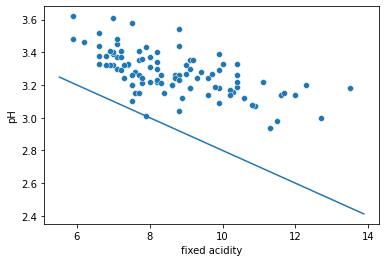

In [92]:
ax = sns.scatterplot(x="fixed acidity", y="pH", data=sample_wine_df)
plot_line(-0.1, 3.8, ax)

### Find the best linear model by hand

what is the best linear model you can find ? try to define different intercepts and slopes by hand

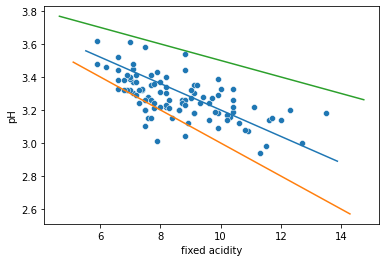

In [93]:
ax = sns.scatterplot(x="fixed acidity", y="pH", data=sample_wine_df)
a_list = [-0.08, -0.1, -0.05]
b_list = [4, 4, 4]
for i in range(len(a_list)):
    plot_line(a_list[i], b_list[i], ax)

Compare to seaborn regplot

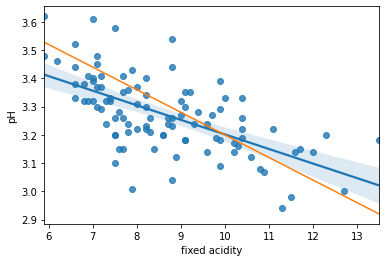

In [94]:
# plot your linear model with regplot and compare
ax = sns.regplot(y='pH', x='fixed acidity', data=sample_wine_df)
plot_line(-0.08, 4, ax)

How far is your linear model from seaborn model?

In [95]:
# quite different, the slope is higher than the one calculated by regplot

How do you evaluate the performance of your linear models at each iteration ?

In [96]:
# using a loss function to evaluate 
# the difference between observations and predictions

In [97]:
# function that calculate the square errors
def squared_errors(slope, intercept, fixed_acidity, pH):
    return (pH - ((slope * fixed_acidity) + intercept)) ** 2

In [98]:
# function that calculate the mse
def mse(slope, intercept, fixed_acidity, pH):
    errors = squared_errors(slope, intercept, fixed_acidity, pH)
    return np.mean(errors)

In [99]:
mse(-0.1, 4, sample_wine_df["fixed acidity"], sample_wine_df.pH)

0.035038000000000034

In [100]:
squared_errors(-0.1, 4, sample_wine_df["fixed acidity"], sample_wine_df.pH).sum()

3.5038000000000027

### Find the best parameters with an algorithm

Try to create a method where each time you define a slope or intercept, you reduce the error of the model. Then, you iterate to find the best model

Hint: choose a fixed intercept, find the slope that reduce the error of the model. Then keep that slope, find the new intercept that reduce the error of the model ...

##### Fixing intercept to find best slope

In [101]:
intercept_initial_guess = 4 # For instance, we may suppose there is always a small transaction fee even for very small flats?

# Create a range of 100 slopes which contains what you believe is the optimal slope (hint: np.linspace())
slope_range = np.linspace(-0.1,-0.05,100)

# Create the list of MSEs for each slope value
mses = list(map(lambda x: mse(x, intercept_initial_guess, sample_wine_df["fixed acidity"], sample_wine_df.pH), slope_range))

Text(0, 0.5, 'MSE')

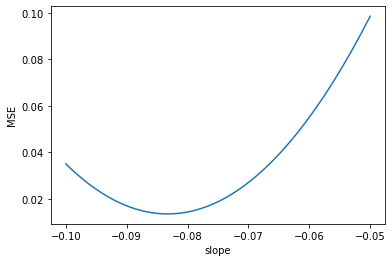

In [102]:
# Plot MSEs against slopes. Do you see a minimum? If not, try another range of slopes!
plt.plot(slope_range, mses)
plt.xlabel("slope")
plt.ylabel("MSE")

In [103]:
mse_min = min(mses)
slope_best = slope_range[mses.index(mse_min)]
print('mse_min:', mse_min)
print('slope_best:', slope_best)

mse_min: 0.013490916666666677
slope_best: -0.08333333333333334


##### Fixing best slope to find best intercept

Text(0, 0.5, 'MSE')

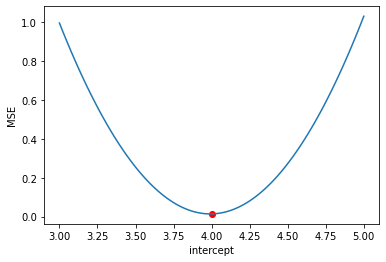

In [104]:
# Create a range of 100 intercepts which contains what you believe is the optimal intercept
intercept_range = np.linspace(3,5, 100)

# Create the list of MSEs for each intercept value
mses = list(map(lambda x: mse(slope_best, x, sample_wine_df["fixed acidity"], sample_wine_df.pH), intercept_range))

# Plot MSEs against slopes. Do you see a minimum? If not, try another range of slopes!
plt.plot(intercept_range, mses)
plt.scatter(intercept_initial_guess, mse(slope_best, intercept_initial_guess, sample_wine_df["fixed acidity"], sample_wine_df.pH), color = 'r')
plt.xlabel('intercept')
plt.ylabel("MSE")

In [105]:
# Compute the min value of MSEs for slope=slope_best and store the corresponding best intercept
mse_min = min(mses)
intercept_best = intercept_range[mses.index(mse_min)]

print('mse_min:', mse_min)
print('intercept_best:', intercept_best)

mse_min: 0.013416852795633101
intercept_best: 3.98989898989899


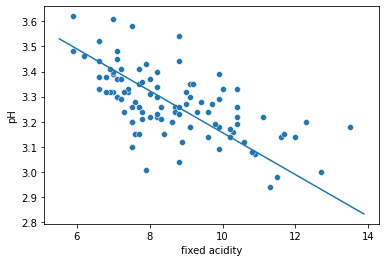

In [106]:
ax = sns.scatterplot(x="fixed acidity", y="pH", data=sample_wine_df)
plot_line(slope_best, intercept_best, ax)

How many iterations did you tried ? what are the best intercept and slope you found? Are you closer to the seaborn linear model ?  

In [107]:
# just 2 iterations. 
print(slope_best)
print(intercept_best)


-0.08333333333333334
3.98989898989899


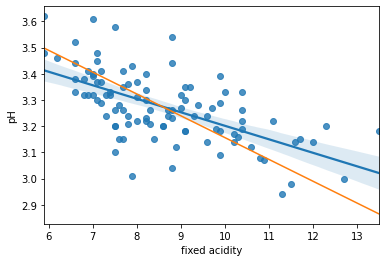

In [108]:
# plot your linear model with regplot and compare
ax = sns.regplot(y='pH', x='fixed acidity', data=sample_wine_df)
plot_line(slope_best, intercept_best, ax)

According to you ... is this the OLS method ? can you describe with your own words, how it works? how different is from your method ?

Compare with the Linear regression used in scikit learn

In [109]:
# Import the model
from sklearn.linear_model import LinearRegression

# Instanciate the model
model = LinearRegression()

# Define X and y
X = sample_wine_df[['fixed acidity']]
y = sample_wine_df['pH']

# Train the model on the data
model.fit(X, y)

# check results
# model's slope (a)
print(model.coef_)

# model's intercept (b)
print(model.intercept_)

[-0.051601]
3.7176554637668797


Are you close to these values ?

In [110]:
# a bit, but not enough

# my best parameters
print(slope_best)
print(intercept_best)


-0.08333333333333334
3.98989898989899


In [111]:
# sklearn best parameters
print(model.coef_)
print(model.intercept_)

[-0.051601]
3.7176554637668797


In [112]:
mse(slope_best, intercept_best, sample_wine_df["fixed acidity"], sample_wine_df.pH)

0.013416852795633101

In [113]:
mse(model.coef_, model.intercept_, sample_wine_df["fixed acidity"], sample_wine_df.pH)

0.010852905727191513

How do you interpret these values? What do they say about the pH and fixed acidity?

In [114]:
# the mean error between 

## inference analysis

Get a new sample of 100 with different random state (seed) = 60

In [134]:
import random

wine_df2 = wine_df.sample(n=100,random_state=60)
wine_df2


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
31,6.9,0.685,0.00,2.5,0.105,22.0,37.0,0.99660,3.46,0.57,10.6,6
844,9.9,0.250,0.46,1.7,0.062,26.0,42.0,0.99590,3.18,0.83,10.6,6
1573,6.0,0.580,0.20,2.4,0.075,15.0,50.0,0.99467,3.58,0.67,12.5,6
150,7.3,0.330,0.47,2.1,0.077,5.0,11.0,0.99580,3.33,0.53,10.3,6
258,7.7,0.410,0.76,1.8,0.611,8.0,45.0,0.99680,3.06,1.26,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1350,9.0,0.600,0.29,2.0,0.069,32.0,73.0,0.99654,3.34,0.57,10.0,5
677,8.6,0.800,0.11,2.3,0.084,12.0,31.0,0.99790,3.40,0.48,9.9,5
712,8.7,0.690,0.00,3.2,0.084,13.0,33.0,0.99920,3.36,0.45,9.4,5
1078,8.6,0.370,0.65,6.4,0.080,3.0,8.0,0.99817,3.27,0.58,11.0,5


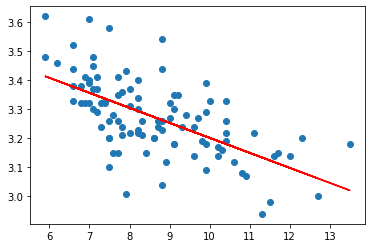

In [116]:
x = sample_wine_df["fixed acidity"]
y = sample_wine_df["pH"]
plt.scatter(x, y)

pred = -0.051601 * x +3.7176554637668797
plt.plot(x, pred, color='red')

In [117]:
def coef_determination(y, pred):
    u = ((y - pred)**2).sum()
    v = ((y - y.mean())**2).sum()
    return 1 - u/v
coef_determination(y, pred)

0.3843269643536662

Does your best linear model fit with this new sample set ?  Why ?


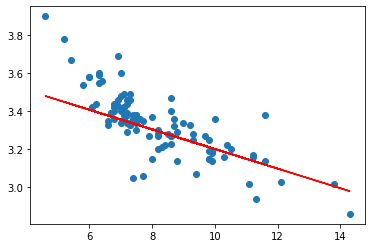

In [136]:
x = wine_df2["fixed acidity"]
y = wine_df2["pH"]
plt.scatter(x, y)

y = -0.051601 * x + 3.7176554637668797
plt.plot(x, y, color='red')

How can you solve the problem ?

# Predict wine quality - regression problem

## Simple Linear regression

Let's try to create a new linear regression. This time, try to find the best model to predict quality in function of pH

Follow the same steps as before: 
- choose a random sample with fixed seed
- use seaborn to see the linear model in this sample
- calculate the best linear regression
- check if the model fits with a new sample

In [138]:
# Import the model
from sklearn.linear_model import LinearRegression

# Instanciate the model
model = LinearRegression()

# Define X and y
X = wine_df2[['pH']]
y= wine_df2['quality']

# Train the model on the data
model.fit(X, y)

# check results
# model's slope (a)
print(model.coef_)

# model's intercept (b)
print(model.intercept_)

[-0.50935696]
7.288552642404198


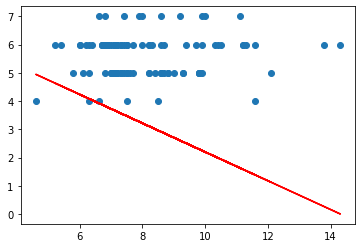

In [139]:
plt.scatter(x, y)
y =-0.50935696* x + 7.288552642404198
plt.plot(x, y, color='red')

How good is this model performing? What is the error? is it low or high ?

### Using Holdout method 

Use train split method to divide the dataset in 70% train set and 30% test set

In [170]:
from sklearn.model_selection import train_test_split

# Choose your feature and your target
X = sample_wine_df[['pH']]
y = sample_wine_df['quality']

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1)

# Choose your model
model = LinearRegression()

# Fit the model with the train set
model.fit(X_train, y_train)

# Evaluate the model with the test set
model.score(X_test, y_test)

-0.1194606883666871

Is this score good or bad? What does it means? 

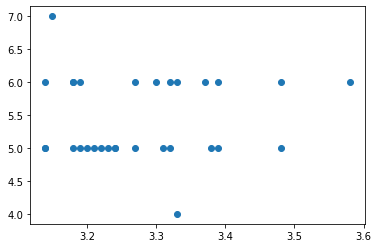

In [126]:
plt.scatter(X_test, y_test)

Try another feature. Replace pH with fixed acidity, volatile acidity, ...

Which feature increases this value? 

In [143]:
from sklearn.model_selection import train_test_split
# Choose your feature and your target
X = wine_df2[['fixed acidity']]
y = wine_df2['volatile acidity']

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1)

# Choose your model
model = LinearRegression()

# Fit the model with the train set
model.fit(X_train, y_train)

# Evaluate the model with the test set
model.score(X_test, y_test)

-0.29503111075329147

Do you think you can do better ?

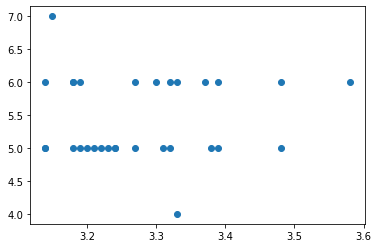

In [129]:
plt.scatter(X_test, y_test)

## Multi linear regression

Let's add multiple features in the regression model. Then create a new model and compare your results with Simple regression. Is it better or worst? 

In [144]:
from sklearn.linear_model import LinearRegression
y= wine_df2['quality']
X = wine_df2[['pH','alcohol', 'fixed acidity', 'density', 'chlorides','quality']]
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1)

# Choose your model
model = LinearRegression()

# Fit the model with the train set
model.fit(X_train, y_train)

# Evaluate the model with the test set
model.score(X_test, y_test)

1.0

In [145]:
from sklearn.linear_model import LinearRegression
y= wine_df2['quality']
X = wine_df2[['pH','alcohol', 'fixed acidity', 'density', 'chlorides']]
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1)

# Choose your model
model = LinearRegression()

# Fit the model with the train set
model.fit(X_train, y_train)

# Evaluate the model with the test set
model.score(X_test, y_test)

0.13940340562378895

Try with all the features (all without column quality of course). 

Create a new model and compare with the last one. Is it better? Why? 



In [146]:
X = sample_wine_df[['pH','alcohol', 'fixed acidity', 'density', 'chlorides']]
sample_wine_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
75,8.8,0.410,0.64,2.2,0.093,9.0,42.0,0.99860,3.54,0.66,10.5,5
1283,8.7,0.630,0.28,2.7,0.096,17.0,69.0,0.99734,3.26,0.63,10.2,6
408,10.4,0.340,0.58,3.7,0.174,6.0,16.0,0.99700,3.19,0.70,11.3,6
1281,7.1,0.460,0.20,1.9,0.077,28.0,54.0,0.99560,3.37,0.64,10.4,6
1118,7.1,0.390,0.12,2.1,0.065,14.0,24.0,0.99252,3.30,0.53,13.3,6
...,...,...,...,...,...,...,...,...,...,...,...,...
529,9.9,0.630,0.24,2.4,0.077,6.0,33.0,0.99740,3.09,0.57,9.4,5
912,10.0,0.460,0.44,2.9,0.065,4.0,8.0,0.99674,3.33,0.62,12.2,6
1227,9.0,0.580,0.25,2.0,0.104,8.0,21.0,0.99769,3.27,0.72,9.6,5
1374,6.8,0.815,0.00,1.2,0.267,16.0,29.0,0.99471,3.32,0.51,9.8,3


If you add the column quality in the variable X, what would happen ? 

In [148]:
X = wine_df2[['pH','alcohol', 'fixed acidity', 'density', 'chlorides']]
#Chi2 select the features with best dependency with target
from sklearn.feature_selection import SelectKBest, chi2
chi2(X, y)

(array([4.72825808e-02, 3.43012992e+00, 5.23190209e-01, 3.89379467e-05,
        4.03841748e-02]),
 array([0.99730401, 0.32993774, 0.91376787, 0.99999994, 0.99786754]))

In [149]:
#select K best features (I chose K=3), then fit_transform it/ get_support returns a numpy boolean array (True==best features) / 
#then Boolean indexing to show the columns
selector = SelectKBest(chi2, k=3)
selector.fit_transform(X, y)
selector.get_support()
np.array(X.columns)[selector.get_support()]

#'Free sulfur' & 'total sulfur' are very correlated so we can choose only one.

array(['pH', 'alcohol', 'fixed acidity'], dtype=object)

Do you think that there are features that are not helping to increase the performance? Which ones do you suspect? 

Do you know a method to identify them? 

How can you find the best combination of features to increase the performance of the model?

# Predict wine quality - classification problem

## convert quality column in 2 classes

Create a classification version (good or bad) of target variable (quality). To do so, let's consider that the wine with quality equal of higher than 7 is good quality and the rest bad quality. 

You can call the new column goodquality

In [120]:
# Create Classification version of target variable
red_df = wine_df.copy()
red_df['goodquality'] = [1 if x >= 7 else 0 for x in red_df['quality']]

# Separate feature variables and target variable
X = red_df.drop(['quality','goodquality'], axis = 1)
y = red_df['goodquality']

red_df['goodquality'].value_counts()
red_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,goodquality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,0


In [152]:
red_df['goodquality'].value_counts()

0    1382
1     217
Name: goodquality, dtype: int64

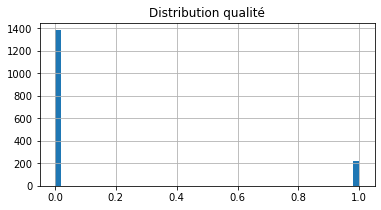

In [154]:
import matplotlib as plt
import seaborn as sns
ax = red_df['goodquality'].hist(bins=50, figsize=(6,3))
ax.set_title('Distribution qualité');

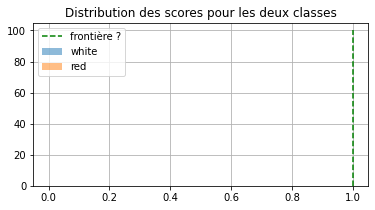

In [157]:
ax =  red_df[ red_df['goodquality'] == 'white']['quality'].hist(bins=25, figsize=(6,3), label='white', alpha=0.5)
red_df[ red_df['goodquality'] == 'red']['quality'].hist(bins=25, ax=ax, label='red', alpha=0.5)
ax.set_title("Distribution des scores pour les deux classes")
ax.plot([1, 1], [0, 100], 'g--', label="frontière ?")
ax.legend();

In [158]:
# Normalize feature variables
from sklearn.preprocessing import StandardScaler
X_features = X
X = StandardScaler().fit_transform(X)

In [159]:
# Splitting the data
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=0)
# Choose your model
model1 = LogisticRegression()

# Fit the model with the train set
model1.fit(X_train, y_train)

# Evaluate the model with the test set
model1.score(X_test, y_test)

0.4

In [160]:
X=red_df[["fixed acidity","volatile acidity","citric acid","residual sugar","chlorides","free sulfur dioxide","total sulfur dioxide","density","pH","sulphates","alcohol"]]
y = red_df['quality']
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1)
# define the model
model1 = LinearRegression()
# fit the model
model1.fit(X, y)
# get importance
importance = model1.coef_
#print the score for each feature
for i,v in enumerate(importance):
    print('Feature:', i, 'Score:', v)

Feature: 0 Score: 0.024990552671674333
Feature: 1 Score: -1.0835902586934347
Feature: 2 Score: -0.18256394841071513
Feature: 3 Score: 0.016331269765474398
Feature: 4 Score: -1.874225158099199
Feature: 5 Score: 0.004361333309096987
Feature: 6 Score: -0.0032645797030685245
Feature: 7 Score: -17.88116383249591
Feature: 8 Score: -0.413653143821759
Feature: 9 Score: 0.9163344127211313
Feature: 10 Score: 0.27619769922688764


How many samples are considered as good and how many are bad? Is this balanced

## Simple Logistic regression

Try to create a first logistic regression model from a sample

In [161]:
from sklearn.metrics import classification_report

model1 = LogisticRegression(max_iter=1000)
model1.fit(X_train, y_train)
y_pred1 = model1.predict(X_test)

print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        21
           5       0.65      0.76      0.70       207
           6       0.56      0.59      0.57       195
           7       0.42      0.27      0.33        52
           8       0.00      0.00      0.00         3

    accuracy                           0.60       480
   macro avg       0.27      0.27      0.27       480
weighted avg       0.56      0.60      0.57       480



C:\Users\simplon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\simplon\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\simplon\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.

In [165]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1)


pipe = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000))

pipe = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000))
pipe.fit(X_train, y_train)  # apply scaling on training data

pipe.score(X_test, y_test)  # apply scaling on testing data, without leaking training data.


0.5895833333333333

In classification, how do you evaluate the performance of the model ?

In [ ]:
In Logitic Regression with accurency

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


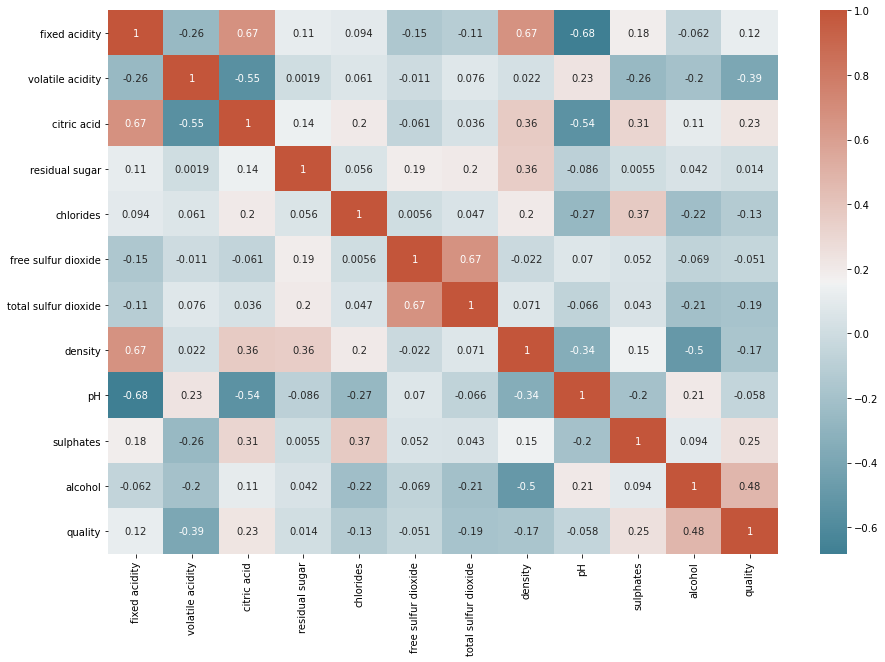

In [166]:
corr = wine_df.corr()
plt.pyplot.subplots(figsize=(15,10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))
corr

In [163]:
from sklearn.metrics import confusion_matrix
pred_predict = pipe.predict(X_test)
confusion_matrix = confusion_matrix(y_test, pred_predict)
confusion_matrix


array([[  0,   0,   2,   0,   0,   0],
       [  0,   1,  10,   9,   1,   0],
       [  0,   0, 158,  47,   2,   0],
       [  0,   0,  70, 109,  16,   0],
       [  0,   0,   4,  33,  15,   0],
       [  0,   0,   0,   1,   2,   0]], dtype=int64)

Text(69.0, 0.5, 'Truth')

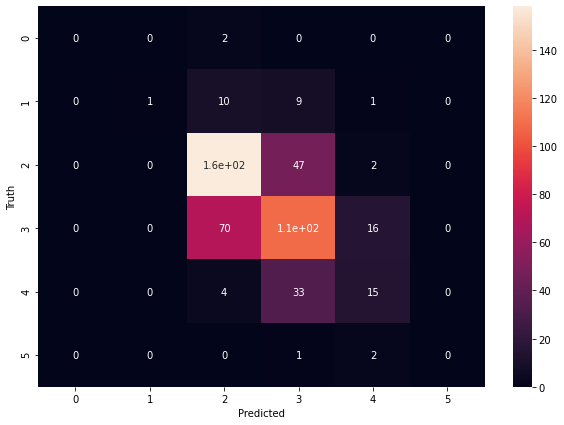

In [169]:
# import seaborn as sn
# plt.figure(figsize = (10,7))
# sn.heatmap(confusion_matrix, annot=True)
# plt.xlabel('Predicted')
# plt.ylabel('Truth') 

import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (10,7))
sns.heatmap(confusion_matrix, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')


Try different pair of data sets: (pH, goodquality), (fixed acidity, goodquality), (alcohol, goodquality) 

Which pair performs better?

In [ ]:
sns.regplot(x='alcohol', y='goodquality', data=wine.df, logistic=true)


## Multi logistic regression

Add new features to the model, try to find the best model reducing the error. 

Use everything you learned so far and good luck :)